# Capstone Project: Yoga Pose Classifier.

In [3]:
#Import all libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

from sklearn.metrics import confusion_matrix
import itertools

#directories
import os
from os import listdir
from os.path import isfile, join

from skimage import color
from skimage import io
from sklearn.model_selection import train_test_split

from skimage import img_as_ubyte
import skimage.transform
import cv2
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import keras
from keras.models import Model


from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense , Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from keras.layers import GlobalAveragePooling2D
from keras.callbacks import EarlyStopping
from keras.layers import Conv2D ,Dropout
# from keras.layers import 

Using TensorFlow backend.


## Overview: 
1. Introduction
2. Webscraping 
3. Primary EDA 
4. Image Preprocessing 
5. Initial CNN Model
6. Evaluste Initial CNN Model

Runs on google colab and kaggle: steps 7 - 10

Pretrained models choosen: IncepResNetV2, InceptionV3, mobilenet, MobileNetV2, Xception
7. Use PreTrained CNN model
8. Evaluate Pretrained CNN model
9. Employ Voting Ensemble 'Hard' & 'Soft' method via combining pretrained models  
10. Evaluate Overall accuracy of Voting Ensemble
11. Conclusion
12. Further Development

## Introduction
### Background: 
In Singapore, yoga has become more popular than ever. With the increasing number of studios open, rising number of people getting teacher trainings and increase yoga variation. It’s a huge business and an ever-growing market. 

The sharp rise of yoga could be contributed to numerous factors:
1. Instagram post 
2. Rising trend of living a balance and healthy lifestyle.

Upon closer inspection into this rising trend, there is a noticeable understanding that due to large variation of yoga poses, there is frequent confusion between yogi on the type of poses they have performed or seen on an instagram post especially concerning intermediate and advance poses.

### Problem Statement: 
Most yogi who have reached intermediate and advance levels, are finding difficulty in identify some poses due to the large variations of yoga poses introduced. 


### Proposed Solution:
Build a CNN model targetted to regonise some of the more popular Intermediate and Advanced yoga poses. 
Yoga poses choosen are based on the following factors:
1. Number of post hashtag with the yoga pose name in sanskrit.
2. The yoga pose are very distinct from each other

A total of 10 poses, targetting various levels of poses in yoga. 

Please see all the poses below:

Begineer (1 pose)
1. vyaghrasana               : Tiger Pose
Link: https://www.tummee.com/yoga-poses/vyaghrasana 
As a test, 1 begineer pose would be included (the purpose of this is to allow testing of the model using real time capture if possible

Intermediate (5 poses)
1. ardhabaddhapadmottanasana : Half Bound Lotus Pose
2. salambasirsasana          : Handstand Pose
3. parivrttaardhachandrasana : Half Moon Pose
4. svargadvijasana           : Birds of Paradise Pose
5. parivrttasuryayantrasana  : Compass Pose
Link: https://www.yogajournal.com/poses/poses-by-level/intermediate-poses
Link: https://www.verywellfit.com/yoga-popular-types-4157111 

Advance (4 poses)
6.  tittibihasana            : Firefly Pose
7.  natarajasana             : Lord of the Dance Pose
8.  vrishchikasana           : Scorpion Pose
9.  ekapadabakasana          : One legged Crane Pose
Link: https://www.yogajournal.com/poses/poses-by-level/advanced-poses



### Begineer Pose
#### Vyaghrasana : Tiger Pose

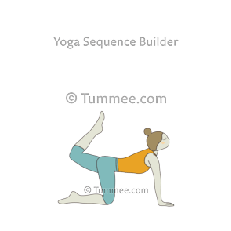

In [256]:
url = 'https://tummeeyoga.s3.amazonaws.com/vyaghrasana_yoga.png'
def plot_url(url):
    img = plt.imread(url)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
plot_url(url)

### Intermediate Pose
### ardhabaddhapadmottanasana : Half Bound Lotus Pose

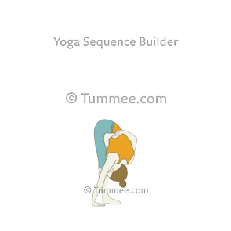

In [251]:
url = 'https://tummeeyoga.s3.amazonaws.com/ardha_baddha_padmottanasana_yoga.png'
plot_url(url)

### salambasirsasana : Handstand Pose

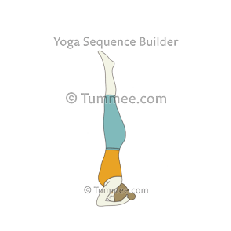

In [252]:
url = 'https://tummeeyoga.s3.amazonaws.com/salamba_sirsasana_yoga.png'
plot_url(url)

### parivrttaardhachandrasana : Half Moon Pose

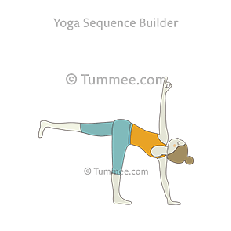

In [253]:
url = 'https://tummeeyoga.s3.amazonaws.com/parivrtta_ardha_chandrasana_yoga.png'
plot_url(url)

### svargadvijasana : Birds of Paradise Pose

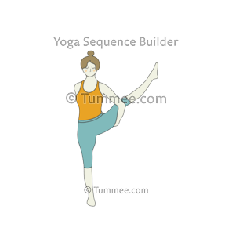

In [254]:
url = 'https://tummeeyoga.s3.amazonaws.com/svarga_dvidasana_paradise_bird_pose_yoga.png'
plot_url(url)

### parivrttasuryayantrasana : Compass Pose Link

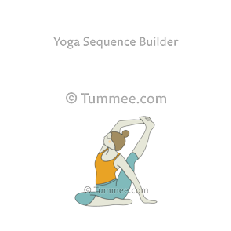

In [257]:
url = 'https://tummeeyoga.s3.amazonaws.com/surya_yantrasana_compass_pose_yoga.png'
plot_url(url)

### Advanced Pose
### tittibihasana            : Firefly Pose

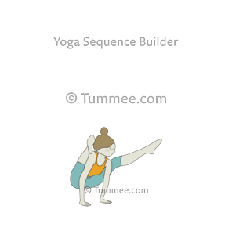

In [258]:
url = 'https://tummeeyoga.s3.amazonaws.com/tittibhasana_yoga.png'
plot_url(url)

### natarajasana             : Lord of the Dance Pose

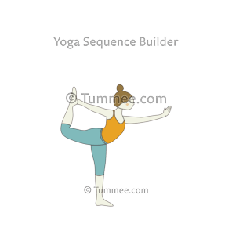

In [259]:
url = 'https://tummeeyoga.s3.amazonaws.com/natarajasana_yoga.png'
plot_url(url)

### vrishchikasana           : Scorpion Pose

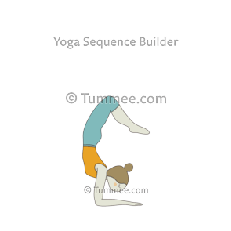

In [261]:
url = 'https://tummeeyoga.s3.amazonaws.com/vrschikasana_yoga.png'
plot_url(url)

### ekapadabakasana :  One legged Crane Pose

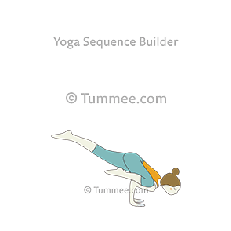

In [262]:
url = 'https://tummeeyoga.s3.amazonaws.com/one_legged_crane_pose__eka_pada_bakasana_yoga.png'
plot_url(url)

## Webscraping
### Instagram Webscraper is employed for this stage
Link : https://github.com/rarcega/instagram-scraper
1. For every pose chosen above, approximately 2000 post were webscrapped.
2. A total of 20,000 images were extracted for analysis.

Reference on the various images scrapped is presented below

In [56]:
image_dir = './sample images/'

In [57]:
import os
image_ls = []
for dirname, _, filenames in os.walk(image_dir):
    
    image_ls.append([dirname.replace(image_dir,''),filenames])
reorder = [0,1,3,4,5,6,7,8,9,10,2]
image_ls = [ image_ls[i] for i in reorder]
image_ls.pop(0)
# ls for ls in image_ls for 
len(image_ls),image_ls[0] # per category is displayed in the following format # use for EDA

(10,
 ['1. vyaghrasana',
  ['33630410_1836304293341693_1975627420778102784_n.jpg',
   '33638661_1377273802416168_2604063887317794816_n.jpg']])

## Primary EDA 
### Display Raw Poses obtain from webscraping.

Plotting out each category webscrape images

1. vyaghrasana


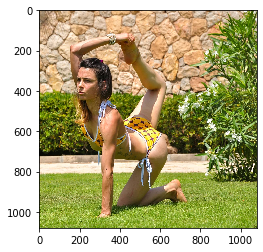

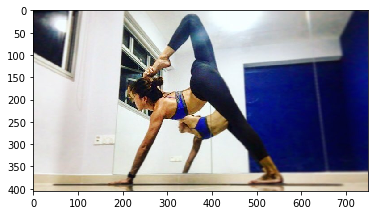

2. ardhabaddhapadmottanasana


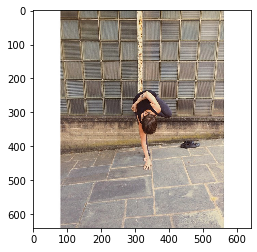

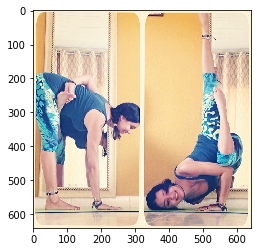

3. salambasirsasana


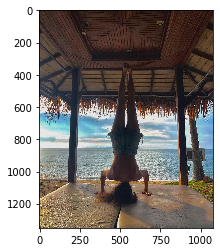

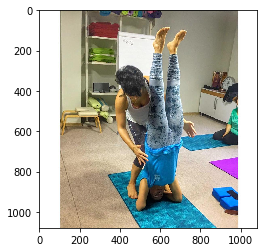

4. parivrttaardhachandrasana


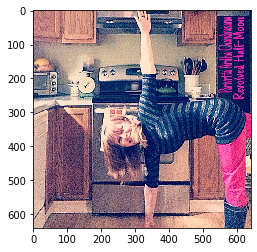

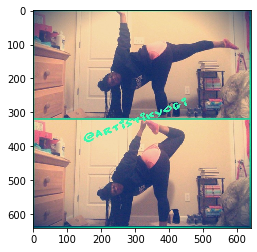

5. svargadvijasana


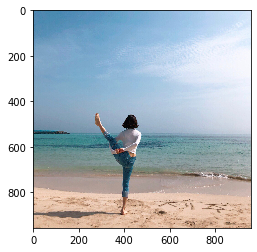

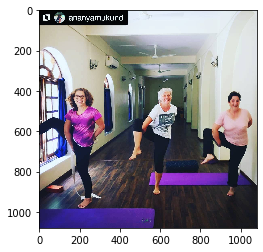

6. parivrttasuryayantrasana


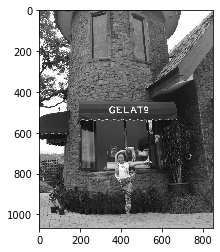

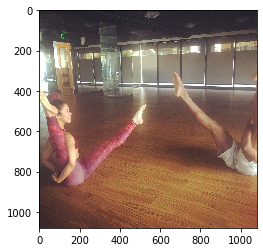

7. tittibhasana


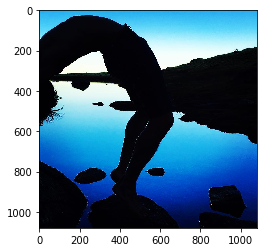

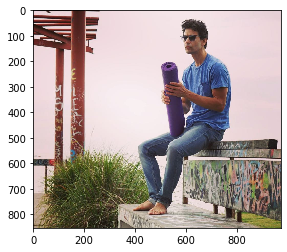

8. natarajasana


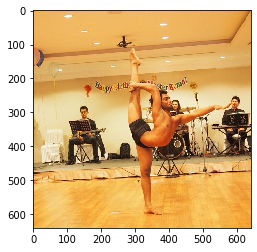

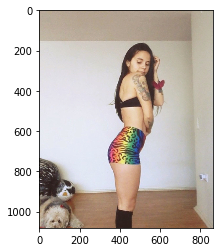

9. vrishchikasana


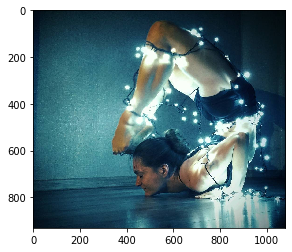

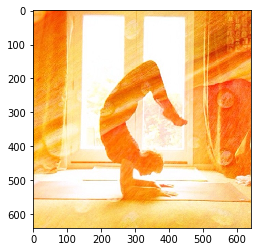

10. ekapadabakasana


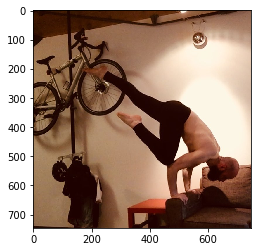

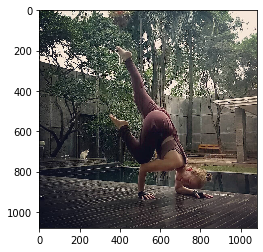

In [58]:
for j in range(len(image_ls)):
    print(image_ls[j][0]) # display the category
    for i in range(len(image_ls[0])):
        image_fullpath = image_path+image_ls[j][0] +'/' + image_ls[j][1][i]
        image = cv2.imread(image_fullpath)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.show()

As seen in the images scraped from the webscrapper found in github,
1. lighting conditions  
2. varied incorrect poses 
3. random junk  

This is to be expected as these images collected from web scraping

## Image Preprocessing
### Cleaning of webscraping images using YOLOv3 modelling by Darknet
link: https://github.com/pjreddie/darknet

1. Extract out the 'Human' out of the images uusing yolo v3 
2. Manually check each image and determine if the person did a correct image or a good close approximation of the pose. This process is done by a yoga teahcer and 2 yogi with more than 3 years of experience.

In [234]:
weights     = './support_files/yolov3.weights'
cfg        = './support_files/yolov3.cfg'
class_file = "./support_files/coco.names"

In [235]:
# Function to extract out human from images
def yolo_image_1(path,ls):
    
    net = cv2.dnn.readNet(weights, cfg) # use pretrained network by yolo v3
    classes = []
    with open(class_file, "r") as f:
        classes = [line.strip() for line in f.readlines()]
    layer_names = net.getLayerNames()
    output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
    
    for i, image in enumerate(ls):
        image_path = path + image
        img = cv2.imread(image_path)
        
#         img = cv2.resize(img, None, fx=0.4, fy=0.4)
        height, width, channels = img.shape
        print('image id :',i,'input size ',img.shape)
        print('Raw Image')
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.show()
        blob = cv2.dnn.blobFromImage(img,0.00392, (416, 416), (0, 0, 0), True, crop=False)
        net.setInput(blob)
        outs = net.forward(output_layers)
        count = 0
        for out in outs:
            for j, detection in enumerate(out):
                scores = detection[5:]
                class_id = np.argmax(scores)
                confidence = scores[class_id]
                label = str(classes[class_id])
                if label == classes[0]:

                    if confidence > 0.5: # if assumption level of above 50% will accept as a person
                        count +=1
                        center_x = int(detection[0] * width)
                        center_y = int(detection[1] * height)
                        # w,h ~ width of rectangle and height of rectangle
                        # increase dimension of the bounding box by 50% to capture points that might be missed out within yolo noise in image
                        w = int(detection[2] * width * 1.5) 
                        h = int(detection[3] * height * 1.5)
                        # Rectangle coordinates
                        x = int(center_x - w / 2)
                        y = int(center_y - h / 2)
                        startY, endY = y,y+h
                        startX, endX = x,x+w
                        # ensure that dimensions of bounding box do not exceed image size
                        if startY < 0 :
                            startY = 0
                        if startX < 0 :
                            startX = 0
                        if endX > width:
                            endX = width
                        if endY > height:
                            endY = height
                        
                        #if more than 1 human is within photo, this will take out the primary human "largest human figure"
                        # or it will save the other humans as images into a different image path 
                        if count ==1:
                            frame_area = (endY-startY) *(endX-startX)
                            frame = img[startY:endY, startX:endX]
                            print('Processsed Image')

                            plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
                            plt.show()
#                             image_name = name + str(i) + '.jpg'
#                             save_dir_path = save_path + image_name
#                             cv2.imwrite(save_dir_path, frame)
                     
                        elif count > 1: # compare frame area
                            frame_area_new = w*h
                            if frame_area_new > frame_area:
                                frame = img[startY:endY, startX:endX]  
                                print('Processsed Image')
                                plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
                                plt.show()
#                                 image_name = name + str(i) + "_" + str(count) +'.jpg'
#                                 save_dir_path = save_path + image_name
#                                 cv2.imwrite(save_dir_path, frame)
                                print(count,'th file save')
                            else:
                                print(count,'th frame smaller')

In [239]:
# /Users/YLChua/Desktop
read_path = './sample images/7. tittibhasana/'
EDA_image_ls   = [f for f in listdir(read_path) if isfile (join(read_path, f))]
EDA_image_ls[2]


'20589714_105148990195632_6413493694669783040_n.jpg'

image id : 0 input size  (1080, 1080, 3)
Raw Image


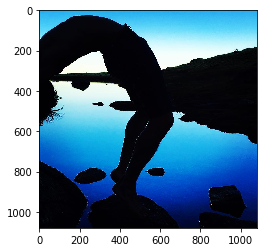

Processsed Image


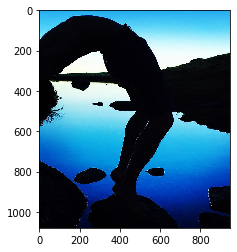

image id : 1 input size  (853, 971, 3)
Raw Image


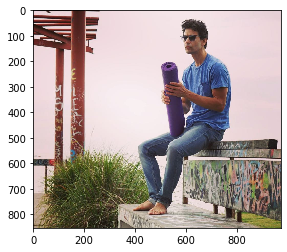

Processsed Image


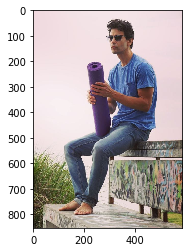

image id : 2 input size  (1080, 1080, 3)
Raw Image


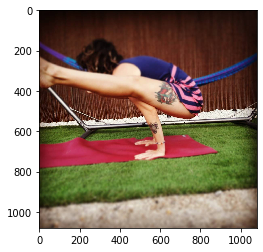

Processsed Image


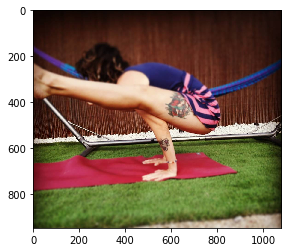

In [237]:
yolo_image_1(read_path,EDA_image_ls)
# the yoga poses shown below is suppose to reflect the tittibhasana : Firefly pose

### Manual cleaning and elimination
1. Image ID 0,1 as incorrect pose and junk photo (removed)
2. Image ID 2 stored at a different location

image id : 0 input size  (1080, 1080, 3)
Raw Image


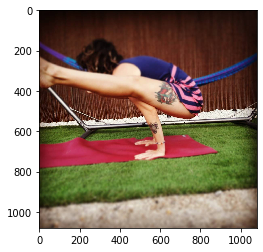

Processsed Image


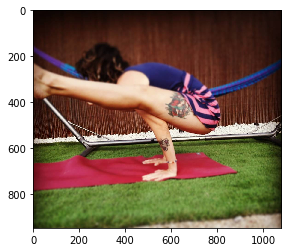

In [241]:
yolo_image_1(read_path,[EDA_image_ls[2]])
# Only one of this image will be stored after manual cleaning

## Initial CNN Model
### Initial Model study is done on 2 yoga poses to determine overall model effectiveness.
##### **Initial CNN model is running on colab using GPU to speed up process**
CNN model will consist of 
1. 5 sets of "2 layers of Conv2D and 1 layer of max Pool"
2. Fully connected Network and use softmax to determine result

In [224]:
classes = ['vrishchikasana','vyaghrasana']

In [225]:
# images were compiled into DataFrames
initial_csv_df_path = '/Users/YLChua/Desktop/Capstone/For Submission/csv/2 image class CNN.csv'
df = pd.read_csv(initial_csv_df_path)
df.head()

image_path              image_name  \
0  /Users/YLChua/Desktop/Capstone/3. 2 image clas...    vrishchikasana_0.jpg   
1  /Users/YLChua/Desktop/Capstone/3. 2 image clas...  vrishchikasana_101.jpg   
2  /Users/YLChua/Desktop/Capstone/3. 2 image clas...  vrishchikasana_102.jpg   
3  /Users/YLChua/Desktop/Capstone/3. 2 image clas...  vrishchikasana_104.jpg   
4  /Users/YLChua/Desktop/Capstone/3. 2 image clas...  vrishchikasana_105.jpg   

         category  
0  vrishchikasana  
1  vrishchikasana  
2  vrishchikasana  
3  vrishchikasana  
4  vrishchikasana

In [226]:
from sklearn.model_selection import train_test_split 
# train will take 60%, valid will take 20%, test will take 20%
train, tempt = train_test_split(df, train_size=0.6, shuffle = True, stratify = df.category)
valid, test  = train_test_split(tempt, test_size=0.5, shuffle = True, stratify = tempt.category)

/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [227]:
size = (320,320)
train_batch_size = 20
batch_size = 10
epoch = 500

train_steps = int(round((train.shape[0]/train_batch_size),0))
valid_steps = int(round((valid.shape[0]/batch_size),0))
test_steps  = int(round((test.shape[0]/batch_size),0))
train_steps,valid_steps,test_steps

(37, 24, 24)

In [228]:
# we create two parameters for data generator for Train, test and validate
data_gen_args = dict(rescale=1./255,
                     featurewise_center=True,
                     featurewise_std_normalization=True,
                     rotation_range=90,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     shear_range = 0.1,
                     horizontal_flip = True,
                     vertical_flip = True,
                     zoom_range=0.2)
dat_gen_args_test = dict(rescale=1./255)

In [229]:
# Flow from DataFrame
train_generator = ImageDataGenerator(**data_gen_args).flow_from_dataframe(
    dataframe     = train,
    directory     = None,
    x_col         = 'image_path',
    y_col         = 'category',
    target_size   = size,
    color_mode    = 'rgb',
    classes       = classes,
    class_mode    = "categorical",
    batch_size    = train_batch_size,
    shuffle       = True,
    seed          = 27,
    save_format   = 'jpg',
    interpolation = "bicubic", 
    validate_filenames = True)

val_generator = ImageDataGenerator(**dat_gen_args_test).flow_from_dataframe(
    dataframe     = valid,
    directory     = None,
    x_col         = 'image_path',
    y_col         = 'category',
    target_size   = size,
    color_mode    = 'rgb',
    classes       = classes,
    class_mode    = "categorical",
    batch_size    = batch_size,
    shuffle       = True,
    seed          = 27,
    save_format   = 'jpg',
    interpolation = "bicubic", 
    validate_filenames = True)

test_generator = ImageDataGenerator(**dat_gen_args_test).flow_from_dataframe(
    dataframe     = test,
    directory     = None,
    x_col         = 'image_path',
    y_col         = 'category',
    target_size   = size,
    color_mode    = 'rgb',
    classes       = classes,
    class_mode    = "categorical",
    batch_size    = batch_size,
    shuffle       = False,
    seed          = 27,
    save_format   = 'jpg',
    interpolation = "bicubic", 
    validate_filenames = True)
    
    

Found 735 validated image filenames belonging to 2 classes.
Found 245 validated image filenames belonging to 2 classes.
Found 245 validated image filenames belonging to 2 classes.


### initiate model (build and train cnn)

In [79]:
# Instantiate a CNN.
cnn_model = Sequential()

#Set 1**************************************************************************
# Add a convolutional layer.
cnn_model.add(Conv2D(filters = 96,         # number of filters
                     kernel_size = 11,        # height/width of filter
                     activation='relu',      # activation function 
                     input_shape=(320,320,3))) # shape of input (image)

# Add a convolutional layer.
cnn_model.add(Conv2D(filters = 96,         # number of filters
                     kernel_size = 11,        # height/width of filter
                     activation='relu'))      # activation function 

# Add a pooling layer.
cnn_model.add(MaxPooling2D(pool_size=(2,2))) # dimensions of region of pooling

#Set 2**************************************************************************
# Add another convolutional layer.
cnn_model.add(Conv2D(64,
                     kernel_size = 6,
                     activation='relu'))

cnn_model.add(Conv2D(64,
                     kernel_size = 6,
                     activation='relu'))

# Add another pooling layer.
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

#Set 3**************************************************************************
# Add another convolutional layer.
cnn_model.add(Conv2D(32,
                     kernel_size = 3,
                     activation='relu'))

cnn_model.add(Conv2D(32,
                     kernel_size = 3,
                     activation='relu'))

# Add another pooling layer.
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

#Set 4**************************************************************************
# Add another convolutional layer.
cnn_model.add(Conv2D(32,
                     kernel_size = 3,
                     activation='relu'))

cnn_model.add(Conv2D(32,
                     kernel_size = 3,
                     activation='relu'))

# Add another pooling layer.
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

#Set 5**************************************************************************
# Add another convolutional layer.
cnn_model.add(Conv2D(32,
                     kernel_size = 3,
                     activation='relu'))

cnn_model.add(Conv2D(32,
                     kernel_size = 3,
                     activation='relu'))

# Add another pooling layer.
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

# We have to remember to flatten to go from the "box" to the vertical line of nodes!
cnn_model.add(Flatten())

# Add a densely-connected layer with 512 neurons.
cnn_model.add(Dense(512, activation='relu'))

# Let's try to avoid overfitting!
# cnn_model.add(Dropout(0.5))

# Add a densely-connected layer with 256 neurons.
cnn_model.add(Dense(128, activation='relu'))

# Let's try to avoid overfitting!
# cnn_model.add(Dropout(0.5))

# Add a densely-connected layer with 32 neurons.
cnn_model.add(Dense(32, activation='relu'))

# Let's try to avoid overfitting!
# cnn_model.add(Dropout(0.5))

# Add a final layer with 2 neurons.
cnn_model.add(Dense(len(classes), activation='softmax'))

# Compile model
cnn_model.compile(Adam(lr=0.001),loss='categorical_crossentropy', metrics=['accuracy'])

### Model is run on colab and model is save into json and weights format.

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)

cnn_model.fit_generator(train_generator,steps_per_epoch=train_steps,
                    validation_data=val_generator,validation_steps=valid_steps,
                   epochs=epoch,verbose=1,callbacks=[es])

cnn_model.evaluate_generator(val_generator,steps=valid_steps )

#Save Model
cnn_model.save('cnn_model.h5')

### Predict

1. test_generator.reset()
2. predictions = cnn_model.predict_generator(test_batches,steps=test_steps,verbose=1)
3. pred_label=[np.argmax(image_class) for image_class in predictions]
4. labels = (train_batches.class_indices)
5. labels = dict((v,k) for k,v in labels.items())
6. pred_label_class = [labels[k] for k in pred_label]
7. y_true = test_batches.classes
8. print(confusion_matrix(y_true,pred_label_class))

Accuracy of Initial CNN model is too low to give sufficiently good results for it to be conclusive.

In [48]:
classes = ['ardhabaddhapadmottanasana','ekapadabakasana','natarajasana',
           'parivrttaardhachandrasana','parivrttasuryayantrasana','salambasirsasana',
           'svargadvijasana','tittibihasana','vrishchikasana','vyaghrasana']

## Pretrained Models 
### All pretrained models have run on colab/ kaggle using GPU. 

Overall accuracy for Pretrained Models
1. IncepResNetV2
2. InceptionV3
3. mobilenet
4. MobileNetV2
5. Xception

Import all models for voting ensemble

### load all pretrained models
Due to large model size, please only load mobilenet_model, mobileNetV2_model if required

IncepResNetV2_model = load_model('./model files/IncepResNetV2_model.h5')

InceptionV3_model   = load_model('./model files/InceptionV3_model.h5')

mobilenet_model     = load_model('./model files/mobilenet_model_1.h5')

MobileNetV2_model   = load_model('./model files/MobileNetV2_model.h5')

Xception_model      = load_model('./model files/Xception_model.h5')

## Evaluate Pre-trained Models

1. Evaluate overall accuracy of each model.
2. Selective Combine all Dataframes for misclassified photos 'Combine_failed_5' 

In [149]:
ls_name = ['IncepResNetV2','InceptionV3','mobilenet','MobileNetV2','Xception']

In [150]:
drive_path = './csv files/'
file_type  = '_test_df.csv'

IncepResNetV2_df = pd.read_csv(drive_path + ls_name[0] + file_type, index_col=0)
InceptionV3_df   = pd.read_csv(drive_path + ls_name[1] + file_type, index_col=0)
mobilenet_df     = pd.read_csv(drive_path + ls_name[2] + file_type, index_col=0)
MobileNetV2_df   = pd.read_csv(drive_path + ls_name[3] + file_type, index_col=0)
Xception_df      = pd.read_csv(drive_path + ls_name[4] + file_type, index_col=0)

In [151]:
df_ls = [IncepResNetV2_df,InceptionV3_df,mobilenet_df,MobileNetV2_df,Xception_df]
print("shape of each dataframes :'IncepResNetV2' {} 'InceptionV3' {} 'mobilenet' {} 'MobileNetV2' {} 'Xception' {}  ".format(df_ls[0].shape,df_ls[1].shape,df_ls[2].shape,df_ls[3].shape,df_ls[4].shape))
# Due to some uploading issues into google/kaggle notebooks, some photos failed to upload.
# As the impact of these missing photos are to insignificant to the overall result, it is ignored.

shape of each dataframes :'IncepResNetV2' (1164, 6) 'InceptionV3' (1164, 6) 'mobilenet' (1164, 6) 'MobileNetV2' (1164, 6) 'Xception' (1173, 6)  


In [152]:
# Accuracy of each model
accuracy    =[]
for i, df in enumerate(df_ls):
    print(i+1,ls_name[i],100 - (round(df[(df.result==0)].shape[0]/df.shape[0]*100,2)),"%")
    accuracy.append(100 - (round(df[(df.result==0)].shape[0]/df.shape[0]*100,2)))
#Best accuracy is approximately 93.04.

1 IncepResNetV2 92.78 %
2 InceptionV3 93.04 %
3 mobilenet 93.04 %
4 MobileNetV2 89.78 %
5 Xception 92.16 %


In [153]:
accuracy # use for Soft voting ensemble in part 9

[92.78, 93.04, 93.04, 89.78, 92.16]

In [154]:
for i,df in enumerate(df_ls):
    df['model'] = ls_name[i]

Combine_failed_5 is a dataframe to capture all missclassified photos and its various models.

The purpose of this DataFrame:
1. This is to determine if a 'specific' photo happen to be continuously misclassified by multiple models.
2. To form a confusion matrix to determine whoch category is continuously misclassified by another category

In [155]:
Combine_failed_5 = pd.concat([IncepResNetV2_df[(IncepResNetV2_df.result==0)],InceptionV3_df[(InceptionV3_df.result ==0)],mobilenet_df[(mobilenet_df.result ==0)],MobileNetV2_df[(MobileNetV2_df.result ==0)],Xception_df[(Xception_df.result ==0)]],axis = 0)
Combine_failed_5.sort_values(by ='true_label', inplace=True)
Combine_failed_5.reset_index(inplace=True, drop = True)
Combine_failed_5

image_path  \
0    /content/drive/My Drive/General Assembly/Data ...   
1    /content/drive/My Drive/capstone/500_ardhabadd...   
2    /content/drive/My Drive/capstone/500_ardhabadd...   
3    /content/drive/My Drive/capstone/500_ardhabadd...   
4    /content/drive/My Drive/capstone/500_ardhabadd...   
..                                                 ...   
452  /content/drive/My Drive/capstone/500_vyaghrasa...   
453  /content/drive/My Drive/capstone/500_vyaghrasa...   
454  /content/drive/My Drive/capstone/500_vyaghrasa...   
455  /content/drive/My Drive/capstone/500_vyaghrasa...   
456  /kaggle/input/10-class-yoga-poses-image-classi...   

                              image_name                   category  \
0      ardhabaddhapadmottanasana_636.jpg  ardhabaddhapadmottanasana   
1    ardhabaddhapadmottanasana_218_2.jpg  ardhabaddhapadmottanasana   
2     ardhabaddhapadmottanasana_1064.jpg  ardhabaddhapadmottanasana   
3      ardhabaddhapadmottanasana_610.jpg  ardhabaddhapadmottanasana   
4     ardhabaddhapadmottanasana_1005.jpg  ardhabaddhapadmottanasana   
..                                   ...                        ...   
452                  vyaghrasana_270.jpg                vyaghrasana   
453                  vyaghrasana_222.jpg                vyaghrasana   
454                vyaghrasana_588_4.jpg                vyaghrasana   
455                  vyaghrasana_489.jpg                vyaghrasana   
456                  vyaghrasana_616.jpg                vyaghrasana   

     true_label  pred_label  result          model  
0             0           9       0       Xception  
1             0           7       0    MobileNetV2  
2             0           7       0    MobileNetV2  
3             0           8       0  IncepResNetV2  
4             0           7       0    InceptionV3  
..          ...         ...     ...            ...  
452           9           3       0    InceptionV3  
453           9           4       0    InceptionV3  
454           9           8       0    MobileNetV2  
455           9           2       0  IncepResNetV2  
456           9           2       0      mobilenet  

[457 rows x 7 columns]

In [156]:
df_confusion_5 = confusion(Combine_failed_5.true_label,Combine_failed_5.pred_label)
df_confusion_5 = df_confusion_5[(df_confusion_5 >0.3)]
# set threshold for evaluation at 0.3, meaning if wronly classified value is less than 0.3 it will be ignored.
# this is to remove small noise and also to focus on those points of error prone.

In [157]:
df_confusion_5.dropna(axis = 1, how='all', inplace=True)
df_confusion_5.dropna(axis = 0, how ='all',inplace=True)
df_confusion_5

Actual ardhabaddhapadmottanasana  \
Predicted ekapadabakasana                                        NaN   
Predicted natarajasana                                           NaN   
Predicted parivrttasuryayantrasana                          0.695652   
Predicted salambasirsasana                                       NaN   
Predicted svargadvijasana                                        NaN   
Predicted tittibihasana                                     0.391304   
Predicted vrishchikasana                                    0.739130   
Predicted vyaghrasana                                            NaN   

                                    Actual parivrttaardhachandrasana  \
Predicted ekapadabakasana                                       0.36   
Predicted natarajasana                                          0.64   
Predicted parivrttasuryayantrasana                               NaN   
Predicted salambasirsasana                                      0.36   
Predicted svargadvijasana                                       0.52   
Predicted tittibihasana                                         0.36   
Predicted vrishchikasana                                         NaN   
Predicted vyaghrasana                                           0.32   

                                    Actual tittibihasana  Actual vyaghrasana  
Predicted ekapadabakasana                            NaN                 NaN  
Predicted natarajasana                               NaN            0.513514  
Predicted parivrttasuryayantrasana                  0.95                 NaN  
Predicted salambasirsasana                           NaN                 NaN  
Predicted svargadvijasana                            NaN                 NaN  
Predicted tittibihasana                              NaN                 NaN  
Predicted vrishchikasana                             NaN                 NaN  
Predicted vyaghrasana                                NaN                 NaN

Things to note for improvement: 
Poses that are being mis classified. 
1. ardhabaddhapadmottanasana : Half Bound Lotus Pose (is often being wrongly predicted)
2. parivrttaardhachandrasana : Half Moon Pose
3. tittibihasana             : Firefly Pose
4. vyaghrasana               : Tiger Pose

Action taken: 
Check images of Half Bound Lotus Pose and Scorpion Pose (Highest error occurance)
consider increasing numbe of images in these 4 category

## Employ Voting Ensemble 'Hard' & 'Soft' method on pretrained models

Please see VotingClassifier.ipynb for Voting Ensemble Steps

## Evaluate Overall Accuracy of Voting Ensemble methods

Summary: 
1. 4/5 models loaded (IncepResNetV2_model is unable to load due to large file size)
2. 4 Models are used for "Hard" voting : Accuracy of Hard Voting = 98.54%
3. 4 Models are used for "soft voting  : Accuracy of Soft Voting = 98.88%
4. Misclassification for each method is save into DataFrame: Hard and Soft voting csv
5. Randomly checking probability on Successfuly classified photos found that predicted phtots have approximately above 90% predict probability based on Soft voting
6. Evaluation of misclassified photos found that majority of predicted probability is below 50% probability based on Soft voting.

In [161]:
soft_voting_failed = pd.read_csv('./csv files/soft_voting_failed.csv', index_col= 0)
hard_voting_failed = pd.read_csv('./csv files/hard_voting_failed.csv', index_col= 0)

In [162]:
display(hard_voting_failed), print('Number of Misclassified photos',hard_voting_failed.shape[0])

image_path  \
54   /Users/YLChua/Desktop/Capstone/4. image classe...   
179  /Users/YLChua/Desktop/Capstone/4. image classe...   
274  /Users/YLChua/Desktop/Capstone/4. image classe...   
313  /Users/YLChua/Desktop/Capstone/4. image classe...   
324  /Users/YLChua/Desktop/Capstone/4. image classe...   
354  /Users/YLChua/Desktop/Capstone/4. image classe...   
396  /Users/YLChua/Desktop/Capstone/4. image classe...   
460  /Users/YLChua/Desktop/Capstone/4. image classe...   
497  /Users/YLChua/Desktop/Capstone/4. image classe...   
582  /Users/YLChua/Desktop/Capstone/4. image classe...   
649  /Users/YLChua/Desktop/Capstone/4. image classe...   
654  /Users/YLChua/Desktop/Capstone/4. image classe...   
730  /Users/YLChua/Desktop/Capstone/4. image classe...   
880  /Users/YLChua/Desktop/Capstone/4. image classe...   
991  /Users/YLChua/Desktop/Capstone/4. image classe...   

                           image_name                  category  y_true  \
54   parivrttasuryayantrasana_190.jpg  parivrttasuryayantrasana       4   
179           ekapadabakasana_815.jpg           ekapadabakasana       1   
274                tittibhasana_8.jpg             tittibihasana       7   
313              tittibhasana_597.jpg             tittibihasana       7   
324              natarajasana_182.jpg              natarajasana       2   
354        salambasirsasana_149_9.jpg          salambasirsasana       5   
396               vyaghrasana_287.jpg               vyaghrasana       9   
460               vyaghrasana_559.jpg               vyaghrasana       9   
497               vyaghrasana_633.jpg               vyaghrasana       9   
582              tittibhasana_602.jpg             tittibihasana       7   
649            vrishchikasana_137.jpg            vrishchikasana       8   
654           svargadvijasana_882.jpg           svargadvijasana       6   
730           svargadvijasana_472.jpg           svargadvijasana       6   
880              natarajasana_143.jpg              natarajasana       2   
991            natarajasana_475_2.jpg              natarajasana       2   

     Hard_voting  result predict_labels  
54             8       0   [5, 4, 8, 9]  
179            3       0   [1, 3, 3, 3]  
274            3       0   [7, 7, 3, 3]  
313            3       0   [7, 7, 3, 3]  
324            9       0   [2, 2, 9, 9]  
354            8       0   [8, 5, 8, 5]  
396            3       0   [1, 6, 3, 3]  
460            8       0   [8, 6, 2, 9]  
497            7       0   [9, 7, 7, 3]  
582            0       0   [7, 7, 0, 0]  
649            7       0   [0, 8, 7, 7]  
654            7       0   [7, 7, 7, 7]  
730            2       0   [3, 2, 5, 6]  
880            5       0   [5, 5, 2, 5]  
991            9       0   [5, 2, 9, 3]

Number of Misclassified photos 15


(None, None)

In [197]:
hard_wrongly_classified = hard_voting_failed.index.tolist()

In [198]:
def counting(ls):
    counter =[]
    for i in range(len(classes)):
        count = 0
        for j in ls:
            if i == j:
                count+=1
        counter.append(count)      
    return counter

In [216]:
def plot_hard_voting(ls,df):
    for index in ls:
        print('*******************************************')
        print('True label :', classes[int(df.loc[index,'y_true'])], '\nClass      : ' + str(df.loc[index,'y_true']))
        print('-------------------------------------------')
        #import image
        path = df.loc[index,'image_path']
        img = cv2.imread(path)
        
        #plot picture and information
        plt.figure(figsize=(6,3))
        plt.subplot(1,2,1)
        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
        true_label = classes[df.loc[index,'y_true']]
        display_text_image = 'Predicted as \n :' + classes[int(df.loc[index,'Hard_voting'])]
        plt.title(display_text_image,color ='red')
        plt.axis('off')
#         ax.set_title('Normalized occupied \n Neighbors')
#         plot probability 
        plt.subplot(1,2,2)
        ls = df.loc[index,'predict_labels'].strip('[]').split(',')
        ls_input = [ int(item.strip(' ')) for item in ls]
        counter = counting(ls_input)
        
        thisplot = plt.bar(range(len(classes)),counter, color='blue')
        thisplot[df.loc[index,'Hard_voting']].set_color('r')
        display_title_prob = 'Predicted as \n Class :' + str(df.loc[index,'Hard_voting'])
        plt.title(display_title_prob,color ='green')
        plt.ylim([0,4]) # 4 represent number of votes used
        plt.xticks([i for i in range(10)])
        display_text_prob = 'Number of "Hard" votes :'+ str(counter[df.loc[index,'Hard_voting']])
        plt.xlabel(display_text_prob,color ='green')
        
        plt.show()

*******************************************
True label : parivrttasuryayantrasana 
Class      : 4
-------------------------------------------


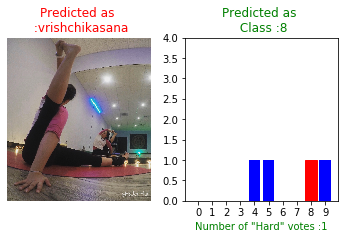

*******************************************
True label : ekapadabakasana 
Class      : 1
-------------------------------------------


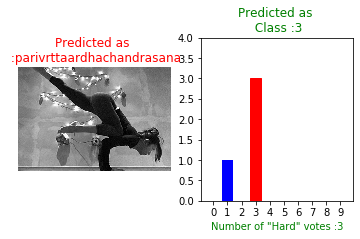

*******************************************
True label : tittibihasana 
Class      : 7
-------------------------------------------


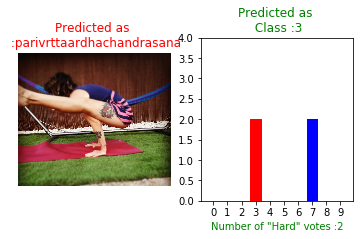

*******************************************
True label : tittibihasana 
Class      : 7
-------------------------------------------


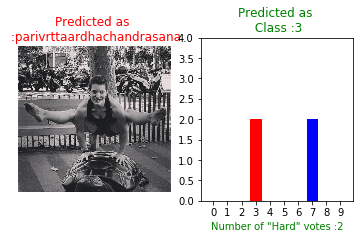

*******************************************
True label : natarajasana 
Class      : 2
-------------------------------------------


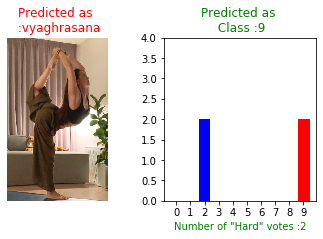

*******************************************
True label : salambasirsasana 
Class      : 5
-------------------------------------------


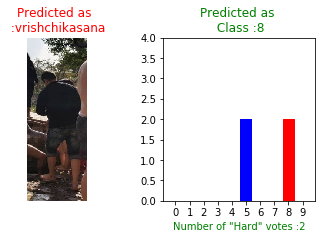

*******************************************
True label : vyaghrasana 
Class      : 9
-------------------------------------------


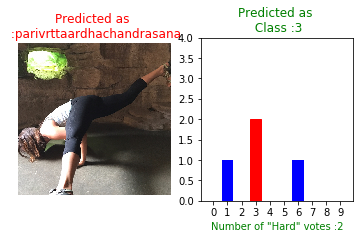

*******************************************
True label : vyaghrasana 
Class      : 9
-------------------------------------------


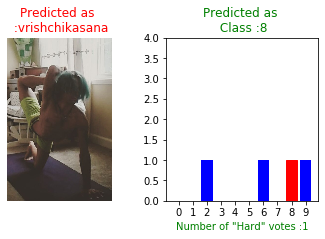

*******************************************
True label : vyaghrasana 
Class      : 9
-------------------------------------------


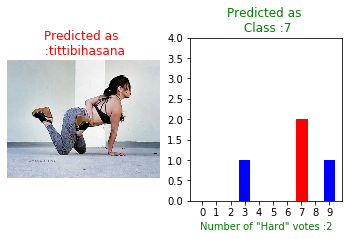

*******************************************
True label : tittibihasana 
Class      : 7
-------------------------------------------


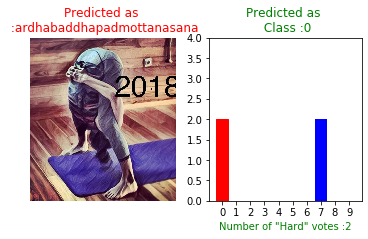

*******************************************
True label : vrishchikasana 
Class      : 8
-------------------------------------------


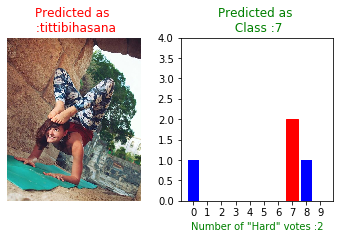

*******************************************
True label : svargadvijasana 
Class      : 6
-------------------------------------------


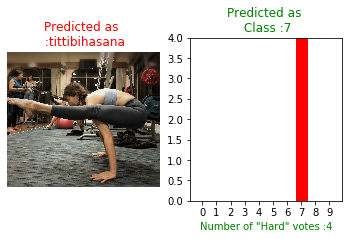

*******************************************
True label : svargadvijasana 
Class      : 6
-------------------------------------------


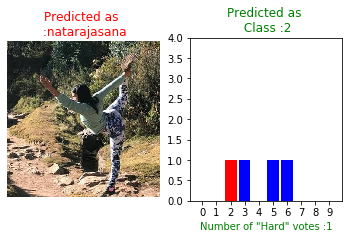

*******************************************
True label : natarajasana 
Class      : 2
-------------------------------------------


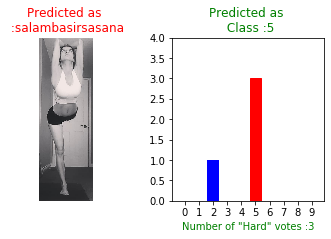

*******************************************
True label : natarajasana 
Class      : 2
-------------------------------------------


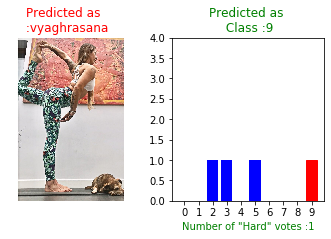

In [217]:
plot_hard_voting(hard_wrongly_classified,hard_voting_failed)

In [140]:
display(soft_voting_failed), print('Number of Misclassified photos',soft_voting_failed.shape[0])

image_path  \
54    /Users/YLChua/Desktop/Capstone/4. image classe...   
179   /Users/YLChua/Desktop/Capstone/4. image classe...   
258   /Users/YLChua/Desktop/Capstone/4. image classe...   
396   /Users/YLChua/Desktop/Capstone/4. image classe...   
460   /Users/YLChua/Desktop/Capstone/4. image classe...   
497   /Users/YLChua/Desktop/Capstone/4. image classe...   
505   /Users/YLChua/Desktop/Capstone/4. image classe...   
649   /Users/YLChua/Desktop/Capstone/4. image classe...   
654   /Users/YLChua/Desktop/Capstone/4. image classe...   
880   /Users/YLChua/Desktop/Capstone/4. image classe...   
1072  /Users/YLChua/Desktop/Capstone/4. image classe...   

                            image_name                  category  y_true  \
54    parivrttasuryayantrasana_190.jpg  parivrttasuryayantrasana       4   
179            ekapadabakasana_815.jpg           ekapadabakasana       1   
258            ekapadabakasana_443.jpg           ekapadabakasana       1   
396                vyaghrasana_287.jpg               vyaghrasana       9   
460                vyaghrasana_559.jpg               vyaghrasana       9   
497                vyaghrasana_633.jpg               vyaghrasana       9   
505           ekapadabakasana_1328.jpg           ekapadabakasana       1   
649             vrishchikasana_137.jpg            vrishchikasana       8   
654            svargadvijasana_882.jpg           svargadvijasana       6   
880               natarajasana_143.jpg              natarajasana       2   
1072               vyaghrasana_493.jpg               vyaghrasana       9   

      soft_voting  result                                      predict_proba  
54              8       0  [0.012148591308052601, 0.0016248602724137156, ...  
179             3       0  [0.004101598562445543, 0.24551726071685553, 0....  
258             7       0  [0.0016641759763617301, 0.40071870532899634, 0...  
396             3       0  [0.014073913402898324, 0.1619087296448648, 0.0...  
460             8       0  [0.0359646935871453, 0.003901636990404222, 0.1...  
497             7       0  [0.0008429483975116454, 0.00027344504405639897...  
505             7       0  [0.00016458805085276253, 0.4133543928592095, 3...  
649             7       0  [0.20019027351306903, 0.008600688378729137, 0....  
654             7       0  [0.0015130724771821407, 0.0005040132691821782,...  
880             5       0  [0.002218324916642814, 0.002182243859535083, 0...  
1072            5       0  [0.00013887278680446116, 0.0005969819511407344...

Number of Misclassified photos 11


(None, None)

In [202]:
soft_wrongly_classified = soft_voting_failed.index.tolist()

In [138]:
def plot_soft_voting(ls,df):
    for index in ls:
        print('*******************************************')
        print('True label :', classes[int(df.loc[index,'y_true'])], '\nClass      : ' + str(df.loc[index,'y_true']))
        print('-------------------------------------------')
        #import image
        path = df.loc[index,'image_path']
        img = cv2.imread(path)
        
        #plot picture and information
        plt.figure(figsize=(6,3))
        plt.subplot(1,2,1)
        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
        true_label = classes[df.loc[index,'y_true']]
        display_text_image = 'Predicted as \n :' + classes[int(df.loc[index,'soft_voting'])]
        plt.title(display_text_image,color ='red')
        plt.axis('off')
#         ax.set_title('Normalized occupied \n Neighbors')
#         plot probability 
        plt.subplot(1,2,2)
        ls = df.loc[index,'predict_proba'].strip('[]').split(',')
        ls_input = [ float(item.strip(' ')) for item in ls]
        
        
        thisplot = plt.bar(range(len(classes)),ls_input, color='blue')
        thisplot[df.loc[index,'soft_voting']].set_color('r')
        display_title_prob = 'Predicted as \n Class :' + str(df.loc[index,'soft_voting'])
        plt.title(display_title_prob,color ='green')
        plt.ylim([0,1])
        plt.xticks([i for i in range(10)])
        display_text_prob = 'Probability  Predicted :'+ str(round(ls_input[df.loc[index,'soft_voting']],2))
        plt.xlabel(display_text_prob,color ='green')
        
        plt.show()

*******************************************
True label : parivrttasuryayantrasana 
Class      : 4
-------------------------------------------


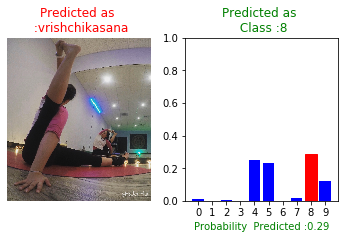

*******************************************
True label : ekapadabakasana 
Class      : 1
-------------------------------------------


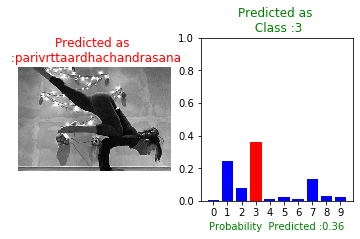

*******************************************
True label : ekapadabakasana 
Class      : 1
-------------------------------------------


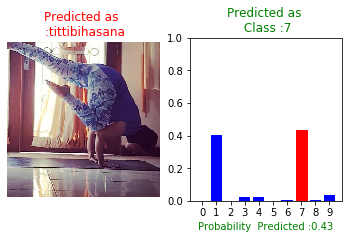

*******************************************
True label : vyaghrasana 
Class      : 9
-------------------------------------------


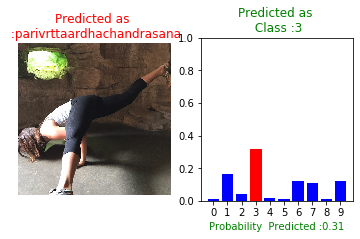

*******************************************
True label : vyaghrasana 
Class      : 9
-------------------------------------------


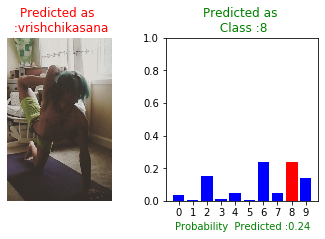

*******************************************
True label : vyaghrasana 
Class      : 9
-------------------------------------------


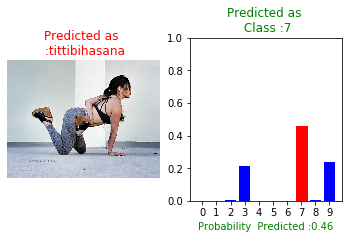

*******************************************
True label : ekapadabakasana 
Class      : 1
-------------------------------------------


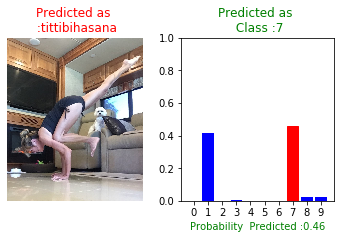

*******************************************
True label : vrishchikasana 
Class      : 8
-------------------------------------------


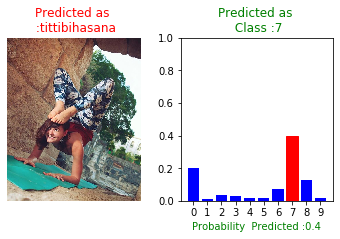

*******************************************
True label : svargadvijasana 
Class      : 6
-------------------------------------------


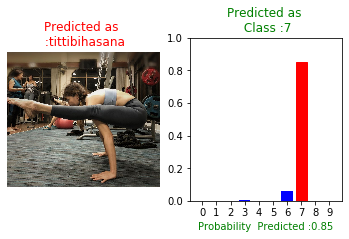

*******************************************
True label : natarajasana 
Class      : 2
-------------------------------------------


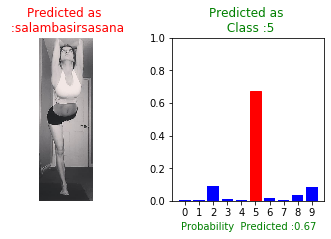

*******************************************
True label : vyaghrasana 
Class      : 9
-------------------------------------------


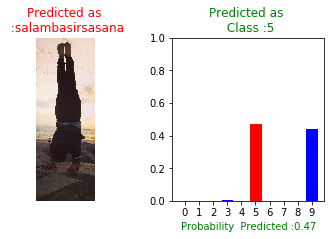

In [203]:
plot_soft_voting(soft_wrongly_classified,soft_voting_failed)

In [222]:
wrongly_classified = list(set(hard_wrongly_classified)& set(soft_wrongly_classified))
print('Number of wrongly classified images for both soft and hard voting :' + str(len(wrongly_classified)))
wrongly_classified 

Number of wrongly classified images for both soft and hard voting :8


[649, 460, 396, 654, 880, 497, 179, 54]

*******************************************
True label : vrishchikasana 
Class      : 8
-------------------------------------------


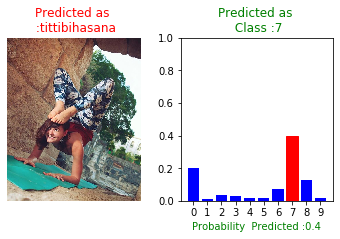

*******************************************
True label : vyaghrasana 
Class      : 9
-------------------------------------------


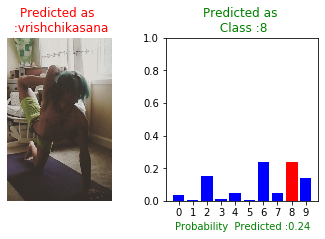

*******************************************
True label : vyaghrasana 
Class      : 9
-------------------------------------------


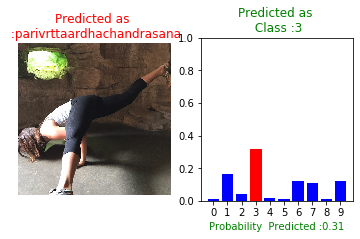

*******************************************
True label : svargadvijasana 
Class      : 6
-------------------------------------------


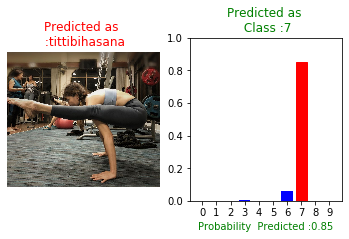

*******************************************
True label : natarajasana 
Class      : 2
-------------------------------------------


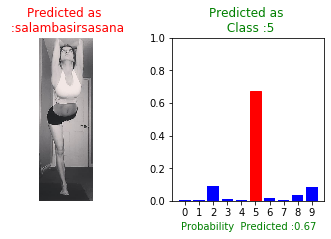

*******************************************
True label : vyaghrasana 
Class      : 9
-------------------------------------------


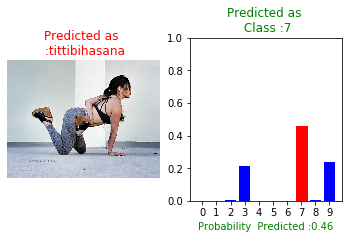

*******************************************
True label : ekapadabakasana 
Class      : 1
-------------------------------------------


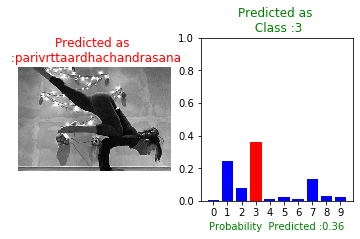

*******************************************
True label : parivrttasuryayantrasana 
Class      : 4
-------------------------------------------


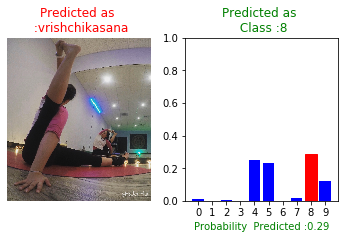

In [213]:
plot_soft_voting(wrongly_classified,soft_voting_failed)
# check respective images if it was classified correctly

## Conclusion

Overall accuracy of 'Soft' voting ensemble method through weighted averages produced the lowest amount of misclassification and highest accuracy[99.05%]. 
However it is important to note the amount of time required to fully load all 4 models is extremely long. 

Based on the misclassified images, 
1. Some images were misclassified during manual cleaning and elimination stage. 
2. yolo does not capture the entire body of the human at times
3. Work on Human pose gesture analysis to identify various parts of the body should be explored futher to enhance accuracy of every single image sent for analysis.
4. Majoirty of misclassified images predicted probability do not exceed 50% (see votingclassifier.ipynb)
5. Majority of correctly classified images probability exceed 90% (see votingclassifier.ipynb)

## Further work

Futher Improvement
1. Seting threshold to reject images that do not predict probability of success above threshold
2. Increase number of poses

Deployment Stage

1. Currently working on real time video capture mode using webcamera, *So excited!*
2. Explore possibility of creating website for people to upload pictures to check on poses

# End of capstone